In [6]:
# Problem 2:

import numpy as np
import pandas as pd
import math
from numpy.linalg import inv

X_test = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/boosting/X_test.csv',header=None)
X_train = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/boosting/X_train.csv',header=None)
Y_test =  pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/boosting/y_test.csv',header=None)
Y_train = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW3/data/boosting/y_train.csv',header=None)



#add a column of 1 to the X dataset
X_train['Intercept'] = 1
X_test['Intercept'] = 1

X_train_matrix = np.matrix(X_train)
X_train_matrix.shape

X_test_matrix = np.matrix(X_test)
X_test_matrix.shape

Y_train_matrix = np.matrix(Y_train)
Y_train_matrix.shape

Y_test_matrix = np.matrix(Y_test)
Y_test_matrix.shape




(1000, 1)

In [7]:
X_train_matrix.shape

(1036, 6)

In [8]:
Y_train_matrix[2,0]

1

In [10]:
#Success

alpha = []
error = []
sample_index = []
X = []
y = []
w = []

for t in range(0,1500):
    if t == 0:
        #w1 be 1/n uniform
        weight = [1/1036]*1036
        
        #bootstrap data
        sample_index_value =  np.random.choice(1036, 1036, p=weight)
        sample_index.append(sample_index_value)
        sample_index_value_matrix = np.matrix(sample_index_value)
        
        X_value = np.matrix(np.zeros(shape=(1036,6)))
        for i in range(0,1036):
            X_value[i,:] = X_train_matrix[sample_index_value_matrix[0,i],:]
        X.append(X_value)
        
        Y_value = np.matrix(np.zeros(shape=(1036,1)))
        for i in range(0,1036):
            Y_value[i,0] = Y_train_matrix[sample_index_value_matrix[0,i],0]
        y.append(Y_value)
        
        #a.transpose()      inv(a)
        w_value = np.matmul(np.matmul(inv(np.matmul(X[t].transpose(),X[t])),X[t].transpose()),y[t])
        
        #Calculate error
        error_value = 0 
        for i in range(0,1036):
            ##########
            if Y_train_matrix[i,0] != np.sign(np.dot(X_train_matrix[i,:],w_value)):
                error_value += weight[i]
    
        
        if error_value > 0.5:
            w_value = -1*w_value
            
            error_value = 0 
            for i in range(0,1036):
                if Y_train_matrix[i,0] != np.sign(np.dot(X_train_matrix[i,:],w_value)):
                    error_value += weight[i]
                            
        error.append(error_value)
        w.append(w_value)
                                       
        alpha_value = (1/2)*np.log((1-error_value)/error_value)
        alpha.append(alpha_value)
        
        w_hat_t_plus_1 = []
        for i in range(0,1036):
            w_hat_t_plus_1_value = weight[i]*np.exp((-1)*alpha[t]*Y_train_matrix[i,0]*np.sign(np.dot(X_train_matrix[i,:],w[t])))
            w_hat_t_plus_1.append(w_hat_t_plus_1_value[0,0])
        sum_w_hat = sum(w_hat_t_plus_1)   
        
        for i in range(0,1036):
            weight[i] = w_hat_t_plus_1[i]/sum_w_hat
            
        

    else:
        
        
        #bootstrap data
        sample_index_value =  np.random.choice(1036, 1036, p=weight)
        sample_index.append(sample_index_value)
        sample_index_value_matrix = np.matrix(sample_index_value)
        
        
        X_value = np.matrix(np.zeros(shape=(1036,6)))
        for i in range(0,1036):
            X_value[i,:] = X_train_matrix[sample_index_value_matrix[0,i],:]
        X.append(X_value)
        
        Y_value = np.matrix(np.zeros(shape=(1036,1)))
        for i in range(0,1036):
            Y_value[i,0] = Y_train_matrix[sample_index_value_matrix[0,i],0]
        y.append(Y_value)
        
        #a.transpose()      inv(a)
        w_value = np.matmul(np.matmul(inv(np.matmul(X[t].transpose(),X[t])),X[t].transpose()),y[t])
        
        #Calculate error
        error_value = 0 
        for i in range(0,1036):
            ##########
            if Y_train_matrix[i,0] != np.sign(np.dot(X_train_matrix[i,:],w_value)):
                error_value += weight[i]
    
        
        if error_value > 0.5:
            w_value = -1*w_value
            
            error_value = 0 
            for i in range(0,1036):
                if Y_train_matrix[i,0] != np.sign(np.dot(X_train_matrix[i,:],w_value)):
                    error_value += weight[i]
                            
        error.append(error_value)
        w.append(w_value)
                                       
        alpha_value = (1/2)*np.log((1-error_value)/error_value)
        alpha.append(alpha_value)
        
        w_hat_t_plus_1 = []
        for i in range(0,1036):
            w_hat_t_plus_1_value = weight[i]*np.exp((-1)*alpha[t]*Y_train_matrix[i,0]*np.sign(np.dot(X_train_matrix[i,:],w[t])))
            w_hat_t_plus_1.append(w_hat_t_plus_1_value[0,0])
        sum_w_hat = sum(w_hat_t_plus_1)   
        
        for i in range(0,1036):
            weight[i] = w_hat_t_plus_1[i]/sum_w_hat
            


In [11]:
len(weight)

1036

In [12]:
alpha


[2.1827727042450449,
 1.1785045374408871,
 0.39794582002579476,
 0.20047625210579262,
 0.044549457833798364,
 0.093852307565963244,
 0.11111379014055654,
 0.11922212451058599,
 0.078530853517175536,
 0.029907878744792019,
 0.016257683591731707,
 0.082497577073377251,
 0.23792794631989247,
 0.11500262286512405,
 0.10102159183530923,
 0.054783249843206532,
 0.090347324491475103,
 0.039735897322357376,
 0.04168159672643347,
 0.11894516888779839,
 0.10449789073089584,
 0.054113316907684644,
 0.15755533741510749,
 0.0036026191705654884,
 0.15978927662285419,
 0.012655116275678866,
 0.024631904177040757,
 0.14846204846777444,
 0.085492974848385028,
 0.030111181822390209,
 0.11145959329568904,
 0.040145572038231089,
 0.082338593012448752,
 0.082008588078741812,
 0.047272725304238844,
 0.00047836644715987622,
 0.011494604746464614,
 0.07756413632931175,
 0.12714589912285065,
 0.063461605615524816,
 0.044540147672141796,
 0.0037341695619970521,
 0.09131181355140959,
 0.11583140386496832,
 0.130

In [13]:
len(alpha)

1500

In [14]:
error

[0.012548262548262547,
 0.086510263929615569,
 0.31090502210288479,
 0.40108351204256287,
 0.4777399952722915,
 0.45321114169002041,
 0.44467062162535664,
 0.44066977664804197,
 0.46081509249104546,
 0.48505051770550156,
 0.49187187431264856,
 0.45884453510507139,
 0.38323117217175678,
 0.44275085116119123,
 0.44966033253120413,
 0.4726357448442855,
 0.45494884986068113,
 0.48014250151524274,
 0.47917126254714326,
 0.44080630913355351,
 0.44794041042343369,
 0.47296972021223904,
 0.42186777380526969,
 0.49819869820766133,
 0.42077846108710737,
 0.4936727796308189,
 0.48768653812921597,
 0.42630958488013576,
 0.45735735437925173,
 0.48494895765663798,
 0.44449984383174462,
 0.47993799058225661,
 0.4589234896024848,
 0.45908738288542816,
 0.47638122843337544,
 0.4997608167946645,
 0.49425295073596365,
 0.4612955186277965,
 0.43676742472312635,
 0.46831172596656478,
 0.47774464112852966,
 0.498132923897177,
 0.45447056210932452,
 0.44234193216037038,
 0.43513594550361934,
 0.4971011541151

In [15]:
len(error)

1500

In [17]:
sample_index


[array([397, 917, 420, ..., 113, 471, 118]),
 array([ 81, 698, 634, ..., 491, 483, 351]),
 array([355, 165, 115, ..., 857, 888, 337]),
 array([934, 670, 336, ..., 156, 151, 155]),
 array([ 155,  164,  888, ..., 1031,  156,  290]),
 array([933, 888, 151, ..., 153, 152, 982]),
 array([333, 931, 121, ..., 113, 118, 155]),
 array([938, 860, 698, ..., 109, 130, 700]),
 array([135,  77, 295, ..., 135, 562, 155]),
 array([152, 299, 333, ..., 698, 110, 934]),
 array([491, 130, 306, ..., 294, 156, 343]),
 array([725, 152, 294, ..., 568, 155, 297]),
 array([1033, 1029,  333, ...,  175,  115,  999]),
 array([892, 936,  37, ..., 333, 176, 151]),
 array([ 227,  925, 1034, ...,  135,  888,  167]),
 array([130, 313, 150, ..., 491, 491, 163]),
 array([333, 159, 156, ..., 365, 682, 313]),
 array([ 333,  161,  858, ...,  151,  888, 1032]),
 array([175, 163, 934, ..., 291, 172, 937]),
 array([ 176, 1034,  160, ...,  573,  304, 1030]),
 array([491, 118, 183, ..., 933, 856, 892]),
 array([155, 888, 110, ..

In [18]:
len(sample_index)

1500

In [19]:
X

[matrix([[ -4.12110000e-01,  -1.23690000e+00,  -6.13690000e-01,
           -5.28270000e-01,  -1.29600000e+00,   1.00000000e+00],
         [  1.45630000e+00,   2.35680000e+00,   1.62760000e+00,
            4.31310000e+00,   2.97400000e+00,   1.00000000e+00],
         [ -6.08790000e-01,  -1.28030000e+00,  -6.13690000e-01,
           -5.55310000e-01,  -1.37680000e+00,   1.00000000e+00],
         ..., 
         [  6.30250000e-01,  -3.38960000e-01,   1.56170000e+00,
            1.09610000e-01,  -1.62800000e-01,   1.00000000e+00],
         [ -9.03790000e-01,  -1.14650000e+00,  -6.13690000e-01,
           -5.19260000e-01,  -1.31180000e+00,   1.00000000e+00],
         [  8.66260000e-01,  -2.42530000e-01,   1.73460000e+00,
            5.59260000e-01,   2.07640000e-03,   1.00000000e+00]]),
 matrix([[ 0.26641, -0.26061, -0.61369, -0.51713, -0.18353,  1.     ],
         [-1.1005 ,  0.84885,  1.0153 , -0.56565,  0.47074,  1.     ],
         [-1.2086 ,  0.98866, -0.61369, -0.5394 ,  0.56355,  1.    

In [20]:
len(X)

1500

In [21]:
y

[matrix([[-1.],
         [ 1.],
         [-1.],
         ..., 
         [ 1.],
         [-1.],
         [ 1.]]), matrix([[-1.],
         [-1.],
         [-1.],
         ..., 
         [-1.],
         [-1.],
         [ 1.]]), matrix([[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]]), matrix([[-1.],
         [-1.],
         [ 1.],
         ..., 
         [-1.],
         [-1.],
         [-1.]]), matrix([[-1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [-1.],
         [-1.]]), matrix([[-1.],
         [ 1.],
         [-1.],
         ..., 
         [ 1.],
         [-1.],
         [-1.]]), matrix([[-1.],
         [-1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [-1.]]), matrix([[-1.],
         [ 1.],
         [-1.],
         ..., 
         [ 1.],
         [-1.],
         [-1.]]), matrix([[ 1.],
         [-1.],
         [ 1.],
         ..., 
         [ 1.],
         [-1.],
         

In [22]:
len(y)

1500

In [23]:
w

[matrix([[-0.31192927],
         [-0.76966642],
         [ 0.68517124],
         [ 0.14673847],
         [ 0.77551782],
         [-0.57628803]]), matrix([[ 0.90007231],
         [ 4.26898077],
         [-0.06455645],
         [ 0.99228177],
         [-4.58884214],
         [-0.72389596]]), matrix([[ 1.84766087],
         [ 7.26728244],
         [ 0.30379004],
         [ 0.74164746],
         [-7.50328487],
         [-0.534548  ]]), matrix([[ 1.04439776],
         [ 4.05687464],
         [ 0.17736493],
         [ 0.39938239],
         [-4.13412674],
         [-0.4580287 ]]), matrix([[ 0.55752424],
         [ 2.31120815],
         [ 0.14059643],
         [ 0.30758626],
         [-2.38756151],
         [-0.33595148]]), matrix([[ 0.54434516],
         [ 2.27643074],
         [ 0.17096807],
         [ 0.10772514],
         [-2.19796759],
         [-0.31761811]]), matrix([[ 0.30923032],
         [ 0.97003879],
         [ 0.05606554],
         [ 0.19654053],
         [-0.98984433],
         [

In [24]:
len(w)

1500

In [25]:
t = []
for i in range(0,1500):
    t.append(i)

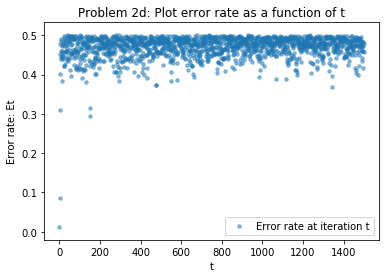

In [26]:
#2d.

import matplotlib.pyplot as plt
# Plot
plt.scatter(t, error,alpha=0.5, s = 12,label='Error rate at iteration t')
plt.title('Problem 2d: Plot error rate as a function of t')
plt.xlabel('t')
plt.ylabel('Error rate: Et')


plt.legend()

plt.show()

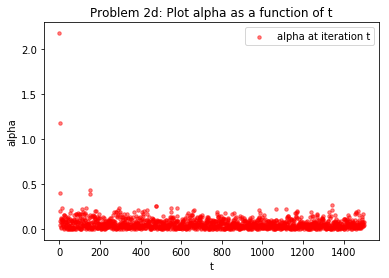

In [27]:
import matplotlib.pyplot as plt
# Plot
plt.scatter(t, alpha,alpha=0.5, s = 12,label='alpha at iteration t', color = 'red')
plt.title('Problem 2d: Plot alpha as a function of t')
plt.xlabel('t')
plt.ylabel('alpha')


plt.legend()

plt.show()

In [28]:
#2b.
import copy
error_1 = copy.copy(error)

upper_bound_prepare = []
for i in range(0,1500):
    upper_bound_prepare_value = (((1/2) - error_1[i])**2)*(-2)
    upper_bound_prepare.append(upper_bound_prepare_value)



In [29]:
upper_bound_prepare

[-0.4752183926894352,
 -0.34194752367111231,
 -0.071513821331820979,
 -0.019568943179667609,
 -0.00099101562095521003,
 -0.0043783945239026919,
 -0.0061226802226489038,
 -0.0070401508059864532,
 -0.0030709139529706431,
 -0.00044697404174704467,
 -0.00013213285437876462,
 -0.0033875445814354017,
 -0.027269918304763816,
 -0.0065549300855361594,
 -0.0050681642417378901,
 -0.0014976049204540954,
 -0.0040592122577509018,
 -0.00078864049214427397,
 -0.00086767260776007403,
 -0.0070077860767848617,
 -0.0054204017337610632,
 -0.0014612720508092771,
 -0.012209289540289004,
 -6.4893762941650247e-06,
 -0.012552104455453923,
 -8.0067435200360346e-05,
 -0.0003032426864865041,
 -0.010860554561075831,
 -0.0036367904510734425,
 -0.00045306775124335298,
 -0.0061605346694014705,
 -0.00080496844375524867,
 -0.0033745594128743485,
 -0.0033476844783271128,
 -0.0011156927406327859,
 -1.1441721142913033e-07,
 -6.6057150486521554e-05,
 -0.002996073756582496,
 -0.0079967171522909858,
 -0.0020082934224361689,
 

In [30]:
upper_bound_prepare_2 = []
for i in range(0,1500):
    upper_bound_prepare_value_2 = sum(upper_bound_prepare[0:i+1])
    upper_bound_prepare_2.append(upper_bound_prepare_value_2)
len(upper_bound_prepare_2)
upper_bound_prepare_2

[-0.4752183926894352,
 -0.81716591636054758,
 -0.88867973769236852,
 -0.90824868087203614,
 -0.9092396964929913,
 -0.91361809101689395,
 -0.9197407712395429,
 -0.92678092204552931,
 -0.92985183599849996,
 -0.93029881004024706,
 -0.9304309428946258,
 -0.93381848747606122,
 -0.96108840578082499,
 -0.9676433358663612,
 -0.97271150010809904,
 -0.97420910502855318,
 -0.97826831728630403,
 -0.97905695777844826,
 -0.97992463038620836,
 -0.98693241646299323,
 -0.99235281819675425,
 -0.99381409024756351,
 -1.0060233797878526,
 -1.0060298691641467,
 -1.0185819736196007,
 -1.0186620410548011,
 -1.0189652837412875,
 -1.0298258383023633,
 -1.0334626287534368,
 -1.0339156965046801,
 -1.0400762311740814,
 -1.0408811996178366,
 -1.0442557590307111,
 -1.0476034435090382,
 -1.0487191362496711,
 -1.0487192506668825,
 -1.048785307817369,
 -1.0517813815739514,
 -1.0597780987262424,
 -1.0617863921486785,
 -1.0627769941456744,
 -1.0627839660920217,
 -1.0669298255213036,
 -1.0735787310953022,
 -1.081993422226

In [31]:
upper_bound = []
for i in range(0,1500):
    upper = np.exp(upper_bound_prepare_2[i])
    upper_bound.append(upper)

In [32]:
len(upper_bound)

1500

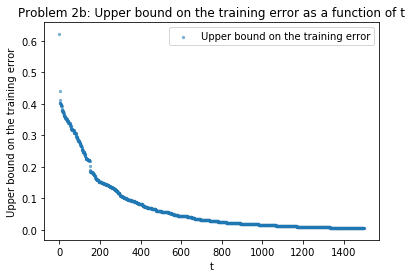

In [33]:
import matplotlib.pyplot as plt
# Plot
plt.scatter(t, upper_bound, s = 5,alpha=0.5, label='Upper bound on the training error')
plt.title('Problem 2b: Upper bound on the training error as a function of t')
plt.xlabel('t')
plt.ylabel('Upper bound on the training error')


plt.legend()

plt.show()

In [34]:
# 2c:

sample_index[1499]



array([150, 150, 928, ..., 127, 150, 151])

In [35]:
152 in sample_index[1035]

True

In [36]:
count_cumulate = []
for i in range(0,1036):
    value = 0
    for j in range(0,1500):
        if i in sample_index[j]:
            value += 1
    count_cumulate.append(value)

In [40]:
count_cumulate
len(count_cumulate)

1036

In [41]:
index = []
for i in range(0,1036):
    index.append(i)
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


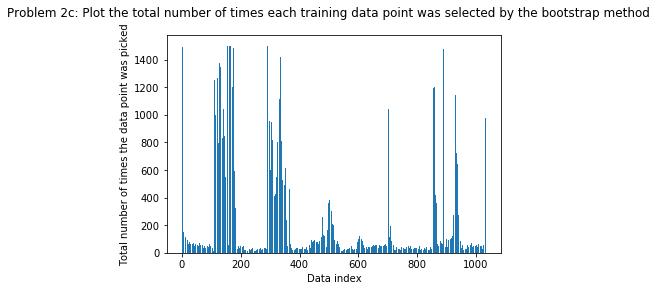

In [42]:
from matplotlib.pyplot import *
x = index
y = count_cumulate
bar(x,y)
plt.xlabel('Data index')
plt.ylabel('Total number of times the data point was picked')
suptitle('Problem 2c: Plot the total number of times each training data point was selected by the bootstrap method')
show()

In [44]:
# 2a:
# t =1:
y_predicted = []
for i in range(0,1036):
    y_hat = (np.sign(np.dot(X_train_matrix[i,:],w[i])))*alpha[i]
    y_predicted.append(y_hat[0,0])
    
y_predicted


for i in range(0,1036):
    if y_predicted[i] >0:
        y_predicted[i] = 1
    else:
        y_predicted[i] = -1
    
y_predicted 
    

number_of_mistake_t1 = 0
for i in range(0,1036):
    if y_predicted[i] != Y_train_matrix[i,0]:
        number_of_mistake_t1 += 1
number_of_mistake_t1

train_error_rate_t1 = number_of_mistake_t1/1036

train_error_rate_t1 

0.4691119691119691

In [148]:
prepare_matrix =  np.matrix(np.zeros(shape=(1036,1500)))
for t in range(0,1500):
    for i in range(0,1036):
        prepare_matrix[i,t] = (np.sign(np.dot(X_train_matrix[i,:],w[t])))*alpha[t]

In [149]:
prepare_matrix 

matrix([[ 2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        [ 2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        [ 2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        ..., 
        [ 2.1827727 , -1.17850454, -0.39794582, ..., -0.16704982,
          0.04528879, -0.08307832],
        [ 2.1827727 , -1.17850454, -0.39794582, ..., -0.16704982,
          0.04528879, -0.08307832],
        [ 2.1827727 , -1.17850454, -0.39794582, ..., -0.16704982,
          0.04528879, -0.08307832]])

In [150]:
train_error_1 = []
for t in range(0,1500):
    temperate = prepare_matrix[:, 0:t+1]
    train_error_1.append(temperate)

In [151]:
train_error_2 = []
for t in range(0,1500):
    value = train_error_1[t].sum(axis=1)
    train_error_2.append(value)

In [152]:
len(train_error_2)

1500

In [153]:
train_error_2[0][1,0]

2.1827727042450449

In [154]:
for t in range(0,1500):
    for i in range(0,1036):
        if train_error_2[t][i,0] > 0:
            train_error_2[t][i,0] = 1
        else:
            train_error_2[t][i,0] = -1

In [155]:
train_error_2[0][2,0]

1.0

In [156]:
len(train_error_2[0])

1036

In [157]:
train_error = []

for t in range(0,1500):
    error_value = 0
    for i in range(0,1036):
        if train_error_2[t][i,0] != Y_train_matrix[i,0]:
            error_value += 1
            train_error_value = error_value/1036
    train_error.append(train_error_value)

In [158]:
train_error 

[0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.02027027027027027,
 0.02027027027027027,
 0.02027027027027027,
 0.019305019305019305,
 0.013513513513513514,
 0.013513513513513514,
 0.012548262548262547,
 0.013513513513513514,
 0.012548262548262547,
 0.013513513513513514,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.01833976833976834,
 0.01833976833976834,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.015444015444015444,
 0.015444015444015444,
 0.015444015444015444,
 0.012548262548262547,
 0.011583011583011582,
 0.012548262548262547,
 0.01447876447876448,
 0.012548262548262547,
 0.012548262548262547,
 0.012548262548262547,
 0.013513513513513514,
 0.015444015444015444,
 0.013513513513513514,
 0.015444015444015444,
 0.015444015444015444,
 0.01447876447876448,
 0.015444015444015

In [159]:
len(train_error)

1500

In [160]:
prepare_matrix_test =  np.matrix(np.zeros(shape=(1000,1500)))
for t in range(0,1500):
    for i in range(0,1000):
        prepare_matrix_test[i,t] = (np.sign(np.dot(X_test_matrix[i,:],w[t])))*alpha[t]

In [161]:
prepare_matrix_test

matrix([[-2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        [ 2.1827727 , -1.17850454,  0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        [-2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        ..., 
        [-2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        [-2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832],
        [-2.1827727 , -1.17850454, -0.39794582, ...,  0.16704982,
         -0.04528879, -0.08307832]])

In [162]:
train_error_1_test = []
for t in range(0,1500):
    temperate = prepare_matrix_test[:, 0:t+1]
    train_error_1_test.append(temperate)

In [163]:
train_error_2_test = []
for t in range(0,1500):
    value = train_error_1_test[t].sum(axis=1)
    train_error_2_test.append(value)

In [164]:
for t in range(0,1500):
    for i in range(0,1000):
        if train_error_2_test[t][i,0] > 0:
            train_error_2_test[t][i,0] = 1
        else:
            train_error_2_test[t][i,0] = -1

In [165]:
train_error_test = []

for t in range(0,1500):
    error_value = 0
    for i in range(0,1000):
        if train_error_2_test[t][i,0] != Y_test_matrix[i,0]:
            error_value += 1
            train_error_value = error_value/1036
    train_error_test.append(train_error_value)

In [166]:
len(train_error_test)

1500

In [167]:
len(train_error)

1500

In [168]:
len(train_error)

1500

In [169]:
t = []
for i in range(0,1500):
    t.append(i)
t

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


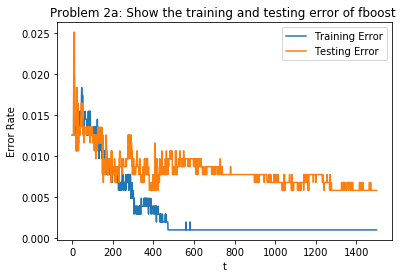

In [171]:
import matplotlib.pyplot as plt
# Plot
#plt.scatter(t, train_error, s = 5,alpha=0.5, label='Training Error',color = 'orange')
#plt.scatter(t, train_error_test, s = 5,alpha=0.5, label='Testing Error',color = 'blue')
plot(t, train_error,label='Training Error')
plot(t, train_error_test,label='Testing Error')


plt.title('Problem 2a: Show the training and testing error of fboost ')
plt.xlabel('t')
plt.ylabel('Error Rate')


plt.legend()

plt.show()